In [30]:
# 设置参数
trainSetPercent = 0.5
num_iterations = 500
learning_rate = 0.001
loadLastTrainData = True
sliceRandomSeed = 0

In [31]:
# 准备数据
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

labels= pd.read_csv('labels_final.csv')
print('data set count:', labels.shape[0])


trainSetCount = math.floor(labels.shape[0] * trainSetPercent)
if trainSetCount < 1: trainSetCount = 1
testSetCount = labels.shape[0] - trainSetCount

print('train set count:', trainSetCount)
print('test set count:', testSetCount)

imgDir = './images/resized/'
imgSize = 0

np.random.seed = sliceRandomSeed
shuffledDataSet = np.array(labels)
# np.random.shuffle(shuffledDataSet)
trainSetRange = shuffledDataSet[:trainSetCount, :]
testSetRange = shuffledDataSet[trainSetCount:trainSetCount + testSetCount, :]

trainSetX = []

for row in trainSetRange:
    img = plt.imread(imgDir + str(row[0]) + '.jpg')
    if imgSize == 0: imgSize = img.size
    elif imgSize != img.size:
        raise ValueError("图片尺寸不一致")
    imgArray = np.array(img)
    imgTrans = imgArray.reshape((1, img.size)).T
    trainSetX.append(imgTrans)

print('image size:', imgSize)

data set count: 5996
train set count: 2998
test set count: 2998
image size: 82944


In [32]:
# 构造训练集
trainSetX = np.array(trainSetX)
trainSetX = trainSetX.squeeze().T / 255
trainSetY = trainSetRange[:,1:].T

In [33]:
# 构造测试集
testSetX = []

for row in testSetRange:
    img = plt.imread(imgDir + str(row[0]) + '.jpg')
    if imgSize != img.size:
        raise ValueError("图片尺寸不一致")
    imgArray = np.array(img)
    imgTrans = imgArray.reshape((1, img.size)).T
    testSetX.append(imgTrans)

testSetX = np.array(testSetX).squeeze().T / 255
testSetY = testSetRange[:,1:].T

last train accuracy: 67.58 %
last test accuracy: 66.74 %
(82944, 1)
(82944, 2998)
Progress: [........................................................................................................................................................................................................] cost: 0.8114
Progress: [##......................................................................................................................................................................................................] cost: 0.9200
Progress: [####....................................................................................................................................................................................................] cost: 0.8084
Progress: [######..................................................................................................................................................................................................] cost: 0.9161
Progress: [###

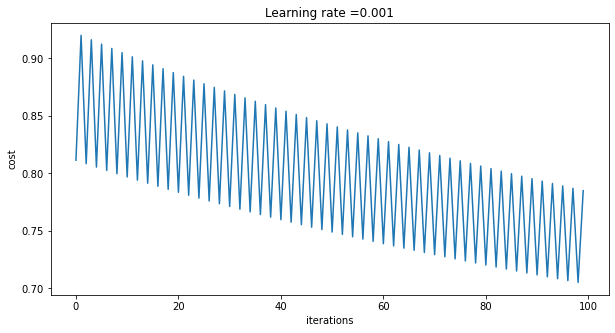

In [34]:
# 训练
import logicRegression
import utils

savedDataDir = './SavedTraining'
saveDataFilePath = 'savedTrainingData.bin'

if loadLastTrainData: loadedData = utils.loadFromeFile(saveDataFilePath)
else: loadedData = None
if loadedData is None:
    loadedData = {
        'w': np.zeros((trainSetX.shape[0],1)),
        'b': 0,
        'testAccuracy': 0.
    }
else:
    print('last train accuracy: %.2f %%' % loadedData['trainAccuracy'])
    print('last test accuracy: %.2f %%' % loadedData['testAccuracy'])

result = logicRegression.modelWithInitialWB(
    trainSetX, trainSetY,
    testSetX, testSetY,
    initial_w = loadedData['w'], initial_b = loadedData['b'],
    num_iterations = num_iterations, learning_rate = learning_rate,
    cost_record_cnt = 100, print_cost = True)

print('delta test accuracy: %.4f' % (result['testAccuracy'] - loadedData['testAccuracy']))
    
# Plot learning curve (with costs)
costs = np.squeeze(result['costs'])
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['figure.dpi'] = 72
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(result["learning_rate"]))
plt.show()

In [35]:
# 保存模型
saveData = {
    'w': result['w'],
    'b': result['b'],
    'costs': result['costs'],
    'trainAccuracy': result['trainAccuracy'],
    'testAccuracy': result['testAccuracy']

}
utils.save2File(saveData, saveDataFilePath)
print('save to', saveDataFilePath, 'done')

save to savedTrainingData.bin done
